Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


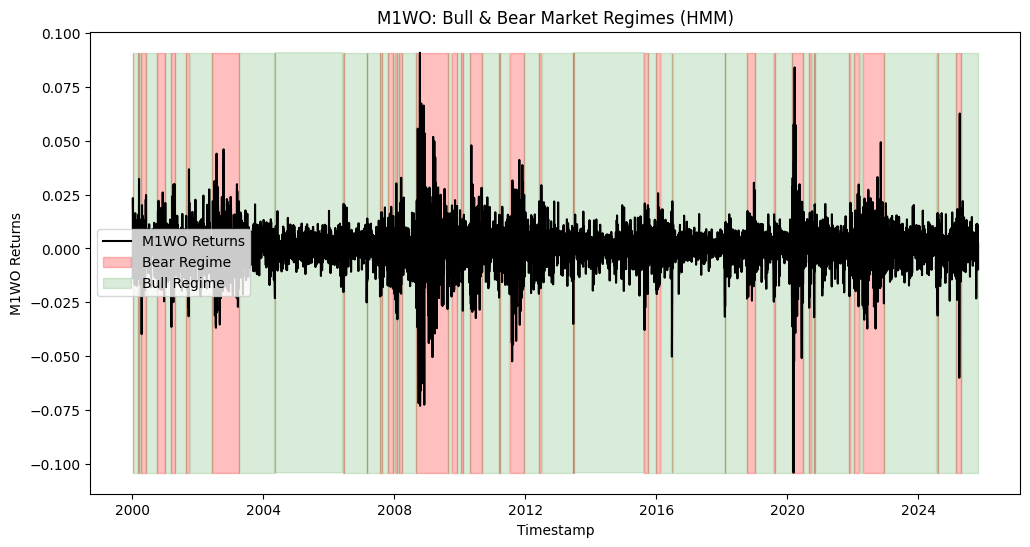

In [2]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.Classification.models_classification as modl
from source.plot_functions.plot_functions_classification import (plot_price_regime_with_error_types_a4,plot_prob_with_boot_ci_and_error_rugs_a4, plot_expanding_accuracy_with_boot_ci_a4,print_metrics_with_bootstrap_uncertainty_and_ci)

import numpy as np
import pandas as pd
df = dp.create_classification_data(quiet=False)
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]


In [6]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2010-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="logit",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)
pred_draws_df = pd.read_csv("../../Data/ModelData/Classification/pred_draws_df_logit.csv", parse_dates=["timestamp"], index_col=0)
# add y_true y_pred and dates as a dataframe new one
pred_df_1 = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})
pred_df_1 = pred_df_1.merge(df[["timestamp", "M1WO_O"]], on="timestamp", how="left")
pred_df_1.to_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv")

CPU worker processing block starting at index 0, date 2010-01-01
CPU worker processing block starting at index 30, date 2010-02-12
CPU worker processing block starting at index 60, date 2010-03-26
CPU worker processing block starting at index 90, date 2010-05-07
CPU worker processing block starting at index 120, date 2010-06-18
CPU worker processing block starting at index 150, date 2010-07-30
CPU worker processing block starting at index 180, date 2010-09-10
CPU worker processing block starting at index 210, date 2010-10-22
CPU worker processing block starting at index 240, date 2010-12-03
CPU worker processing block starting at index 270, date 2011-01-14
CPU worker processing block starting at index 300, date 2011-02-25
CPU worker processing block starting at index 330, date 2011-04-08
CPU worker processing block starting at index 360, date 2011-05-20
CPU worker processing block starting at index 390, date 2011-07-01
CPU worker processing block starting at index 420, date 2011-08-12


In [ ]:
print_metrics_with_bootstrap_uncertainty_and_ci(
    y_true=y_true,
    y_pred=y_pred,
    y_prob=y_prob,
    pred_draws_df=pred_draws_df,
    threshold=0.5,
    p1_col="p1"
)



Model Performance (point + bootstrap mean/std + CI)
--------------------------------------------------------------------------------------
Metric         Point  Boot mean   Boot std     CI lo     CI hi   Nboot
--------------------------------------------------------------------------------------
Accuracy      0.8816     0.8804     0.0014    0.8795    0.8813       2
Precision     0.6535     0.6511     0.0015    0.6502    0.6521       2
Recall        0.8260     0.8223     0.0088    0.8166    0.8279       2
F1            0.7297     0.7268     0.0044    0.7240    0.7296       2
ROC AUC       0.9435     0.9408     0.0033    0.9387    0.9429       2
--------------------------------------------------------------------------------------
CI level: 90%  |  threshold: 0.50



In [3]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2010-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="rf",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)
pred_draws_df = pd.read_csv("../../Data/ModelData/Classification/pred_draws_df_rf.csv", parse_dates=["timestamp"], index_col=0)
# add y_true y_pred and dates as a dataframe new one
pred_df_1 = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})
pred_df_1 = pred_df_1.merge(df[["timestamp", "M1WO_O"]], on="timestamp", how="left")
pred_df_1.to_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv")

CPU worker processing block starting at index 0, date 2010-01-01
CPU worker processing block starting at index 30, date 2010-02-12
CPU worker processing block starting at index 60, date 2010-03-26
CPU worker processing block starting at index 90, date 2010-05-07
CPU worker processing block starting at index 120, date 2010-06-18
CPU worker processing block starting at index 150, date 2010-07-30
CPU worker processing block starting at index 180, date 2010-09-10
CPU worker processing block starting at index 210, date 2010-10-22
CPU worker processing block starting at index 240, date 2010-12-03
CPU worker processing block starting at index 270, date 2011-01-14
CPU worker processing block starting at index 300, date 2011-02-25
CPU worker processing block starting at index 330, date 2011-04-08
CPU worker processing block starting at index 360, date 2011-05-20
CPU worker processing block starting at index 390, date 2011-07-01
CPU worker processing block starting at index 420, date 2011-08-12


FileNotFoundError: [Errno 2] No such file or directory: '../../Data/ModelData/Classification/pred_draws_df_rf.csv'

In [4]:

y_true, y_pred, y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=700,      # fit monthly (approx 30 trading days)
    model="rf",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)
# add y_true y_pred and dates as a dataframe new one
pred_df_2 = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})
pred_df_2 = pred_df_2.merge(df[["timestamp", "M1WO_O"]], on="timestamp", how="left")
pred_df_2.to_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv")

CPU worker processing block starting at index 0, date 2007-01-01
CPU worker processing block starting at index 700, date 2009-09-07
CPU worker processing block starting at index 1400, date 2012-05-14
CPU worker processing block starting at index 2100, date 2015-01-19
CPU worker processing block starting at index 2800, date 2017-09-25
CPU worker processing block starting at index 3500, date 2020-06-01
CPU worker processing block starting at index 4200, date 2023-02-06
CPU worker processing block starting at index 4900, date 2025-10-13


In [ ]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="majority",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

In [ ]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="mantis_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)


In [ ]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="tabpfn25",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

In [ ]:

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="mantis_rf_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)


In [7]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2010-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="logit",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)


CPU worker processing block starting at index 0, date 2010-01-01
CPU worker processing block starting at index 30, date 2010-02-12
CPU worker processing block starting at index 60, date 2010-03-26
CPU worker processing block starting at index 90, date 2010-05-07
CPU worker processing block starting at index 120, date 2010-06-18
CPU worker processing block starting at index 150, date 2010-07-30
CPU worker processing block starting at index 180, date 2010-09-10
CPU worker processing block starting at index 210, date 2010-10-22
CPU worker processing block starting at index 240, date 2010-12-03
CPU worker processing block starting at index 270, date 2011-01-14
CPU worker processing block starting at index 300, date 2011-02-25
CPU worker processing block starting at index 330, date 2011-04-08
CPU worker processing block starting at index 360, date 2011-05-20
CPU worker processing block starting at index 390, date 2011-07-01
CPU worker processing block starting at index 420, date 2011-08-12


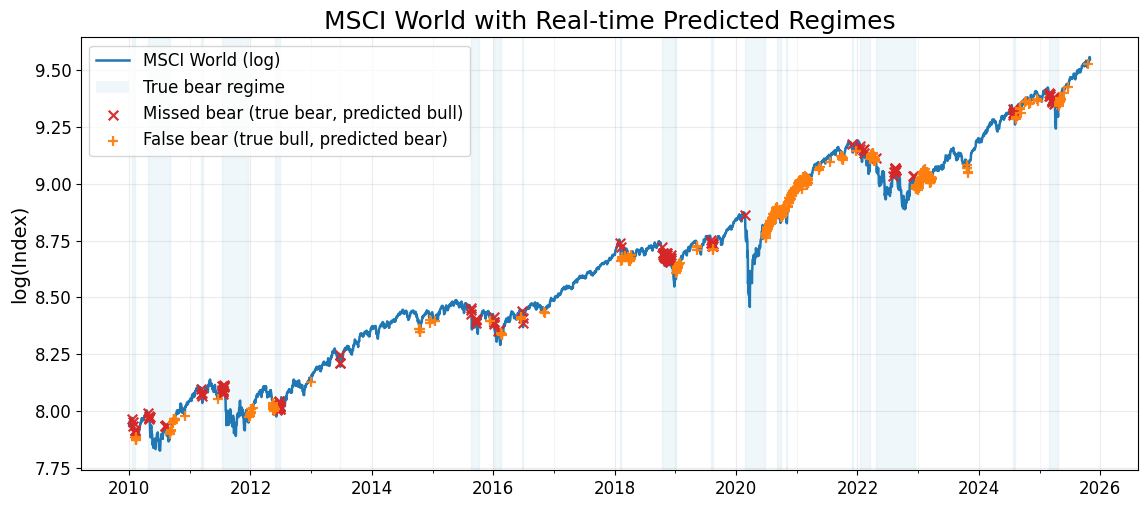

In [19]:

plot_price_regime_with_error_types_a4(
    pred_df,
    price_col="M1WO_O",
    bear_label=1,
    log_price=True,
    shade_alpha=0.18,
    min_shade_run=1,
    title="MSCI World with Real-time Predicted Regimes",
)



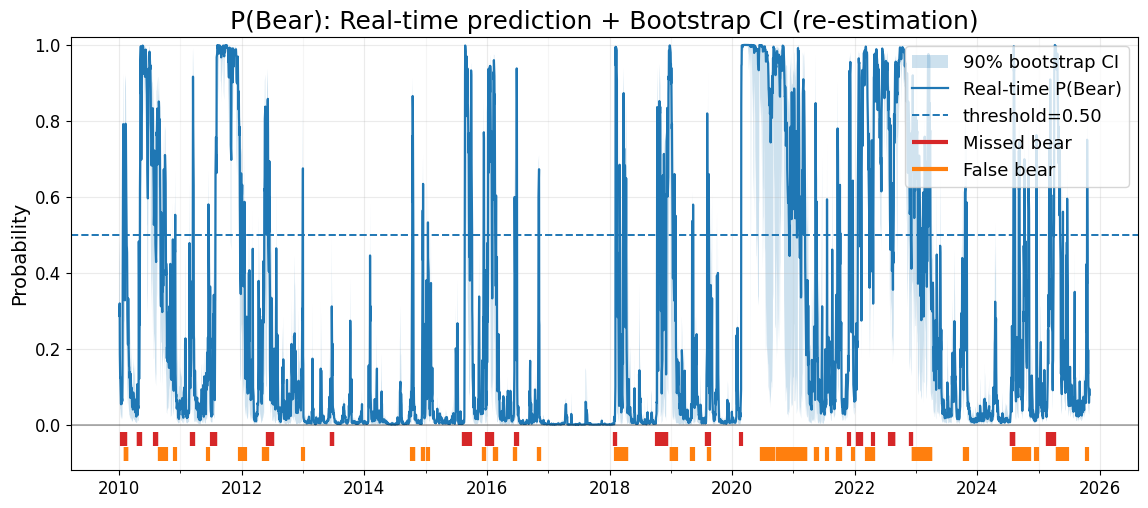

In [14]:


plot_prob_with_boot_ci_and_error_rugs_a4(
    pred_df,
    pred_draws_df,
    prob_col="pred_prob",
    p1_col_draws="p1",
    alpha=0.10,
    threshold=0.5,
    bear_label=1,
    title="P(Bear): Real-time prediction + Bootstrap CI (re-estimation)"
)


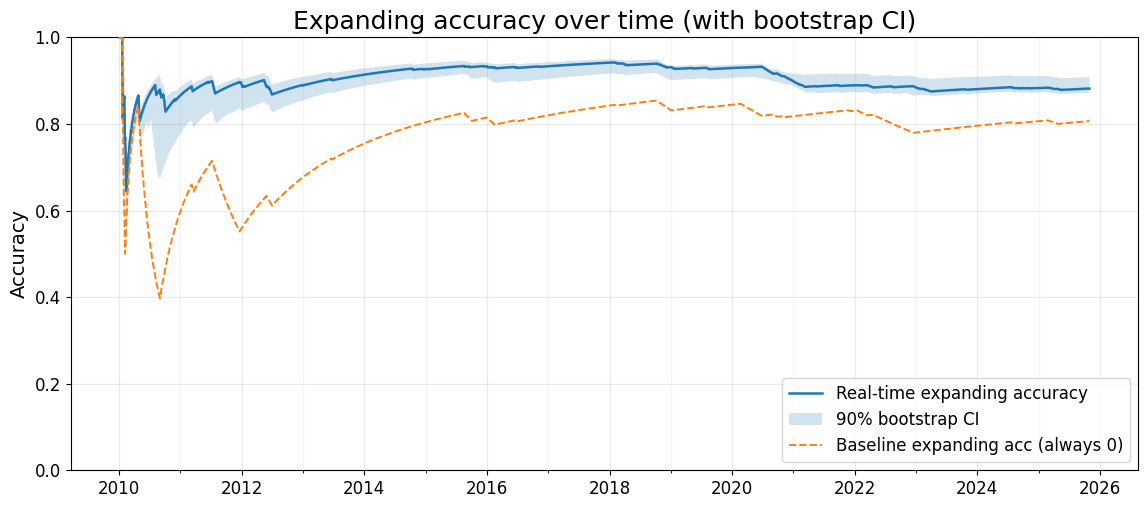

In [15]:

# Example usage:
plot_expanding_accuracy_with_boot_ci_a4(
    pred_df,
    pred_draws_df,
    p1_col_draws="p1",
    alpha=0.10,
    threshold=0.5,
    baseline_label=0,
    title="Expanding accuracy over time (with bootstrap CI)",
)


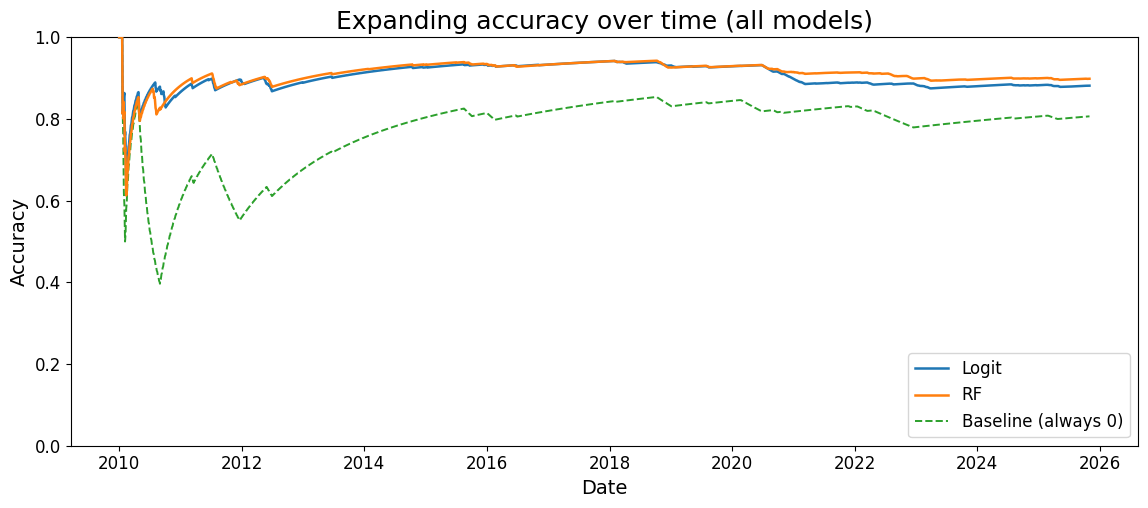

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _ensure_pred_df_index(pred_df: pd.DataFrame) -> pd.DataFrame:
    d = pred_df.copy()
    # if timestamp is a column, use it; otherwise assume index is already datetime-like
    if "timestamp" in d.columns:
        d["timestamp"] = pd.to_datetime(d["timestamp"])
        d = d.set_index("timestamp")
    d.index = pd.to_datetime(d.index)
    # keep only what we need
    if "y_true" not in d.columns or "y_pred" not in d.columns:
        raise ValueError("Each pred_df must contain columns: y_true, y_pred (and optionally timestamp).")
    return d.sort_index()

def plot_expanding_accuracy_multi_models_a4(
    pred_dfs: dict,
    *,
    baseline_label: int = 0,
    title: str = "Expanding accuracy over time (all models)",
    # A4 / print styling
    figsize=(11.7, 5.3),
    base_fontsize: int = 14,
    title_fontsize: int = 18,
    label_fontsize: int = 14,
    tick_fontsize: int = 12,
    legend_fontsize: int = 12,
    line_lw: float = 1.8,
    base_lw: float = 1.4,
):
    """
    Plot expanding accuracy lines for multiple models on one chart (NO bootstrap CI).
    pred_dfs: dict like {"Logit": pred_df_logit, "RF": pred_df_rf, ...}
    """
    if not isinstance(pred_dfs, dict) or len(pred_dfs) == 0:
        raise ValueError("pred_dfs must be a non-empty dict: {model_name: pred_df}.")

    # prep all dfs + find common index
    prepped = {}
    common_idx = None
    for name, pdf in pred_dfs.items():
        d = _ensure_pred_df_index(pdf).dropna(subset=["y_true", "y_pred"]).copy()
        if d.empty:
            raise ValueError(f"pred_df for model '{name}' has no valid rows after dropping NaNs.")
        prepped[name] = d
        common_idx = d.index if common_idx is None else common_idx.intersection(d.index)

    if common_idx is None or len(common_idx) == 0:
        raise ValueError("No common timestamps across provided pred_dfs.")

    # baseline once (using first model's y_true)
    first_name = next(iter(prepped.keys()))
    y_true = prepped[first_name].loc[common_idx, "y_true"].astype(int).to_numpy()
    base_correct = (y_true == baseline_label).astype(float)
    acc_base = np.cumsum(base_correct) / np.arange(1, len(base_correct) + 1)

    # fonts
    plt.rcParams.update({
        "font.size": base_fontsize,
        "axes.titlesize": title_fontsize,
        "axes.labelsize": label_fontsize,
        "xtick.labelsize": tick_fontsize,
        "ytick.labelsize": tick_fontsize,
        "legend.fontsize": legend_fontsize,
    })

    fig, ax = plt.subplots(figsize=figsize)

    # model lines
    for name, d in prepped.items():
        yt = d.loc[common_idx, "y_true"].astype(int).to_numpy()
        yp = d.loc[common_idx, "y_pred"].astype(int).to_numpy()
        correct = (yt == yp).astype(float)
        acc = np.cumsum(correct) / np.arange(1, len(correct) + 1)
        ax.plot(common_idx, acc, linewidth=line_lw, label=name, zorder=3)

    # baseline
    ax.plot(common_idx, acc_base, linewidth=base_lw, linestyle="--",
            label=f"Baseline (always {baseline_label})", zorder=2)

    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.set_ylabel("Accuracy")

    # if you already have _format_date_axis in your notebook, this will use it; else do a simple format
    if "_format_date_axis" in globals():
        _format_date_axis(ax)
    else:
        ax.set_xlabel("Date")

    ax.legend(loc="lower right", frameon=True)
    plt.tight_layout()
    plt.show()


# Example:
plot_expanding_accuracy_multi_models_a4(
    {
        "Logit": pred_df_1,
        "RF": pred_df_2,
        # "TabPFN": pred_df_3,
        # "Mantis": pred_df_4,
    },
    baseline_label=0,
    title="Expanding accuracy over time (all models)",
)



ValueError: Length mismatch for boot_id=0: len(p_boot)=4131 vs len(y_true)=4915. Align pred_draws_df to y_true before calling.